In [1]:
# K-means clustering

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
data = pd.read_csv('Mall_Customers.csv')

# 필요한 열 선택 및 결측값 처리
data = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# 데이터 스케일링
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

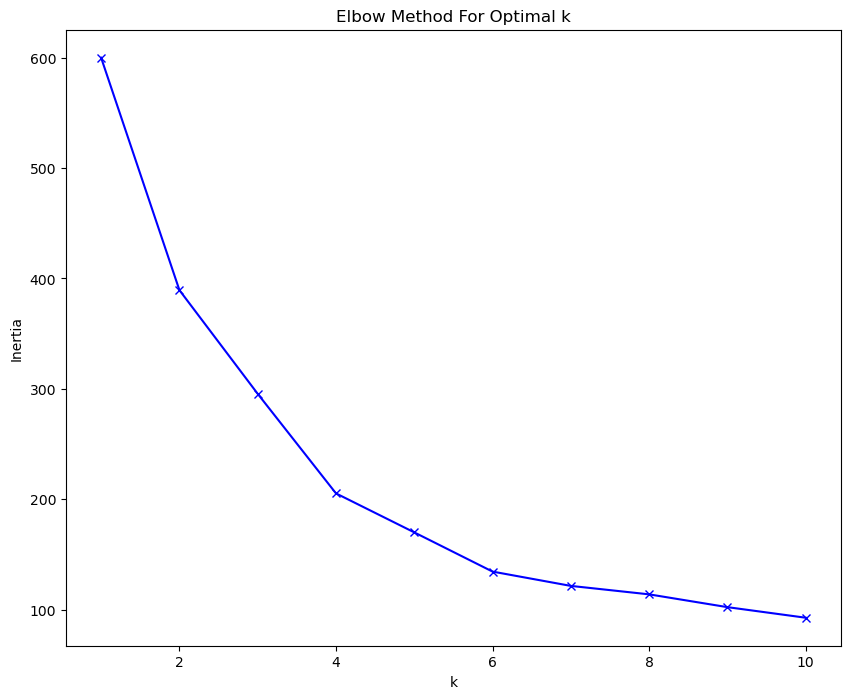

In [3]:
# 최적의 k 찾기 (엘보우 방법)
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# 엘보우 그래프 그리기
plt.figure(figsize=(10, 8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# k=5로 모델 생성 및 학습
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(data_scaled)

# 군집 결과 할당
data['Cluster'] = kmeans.labels_

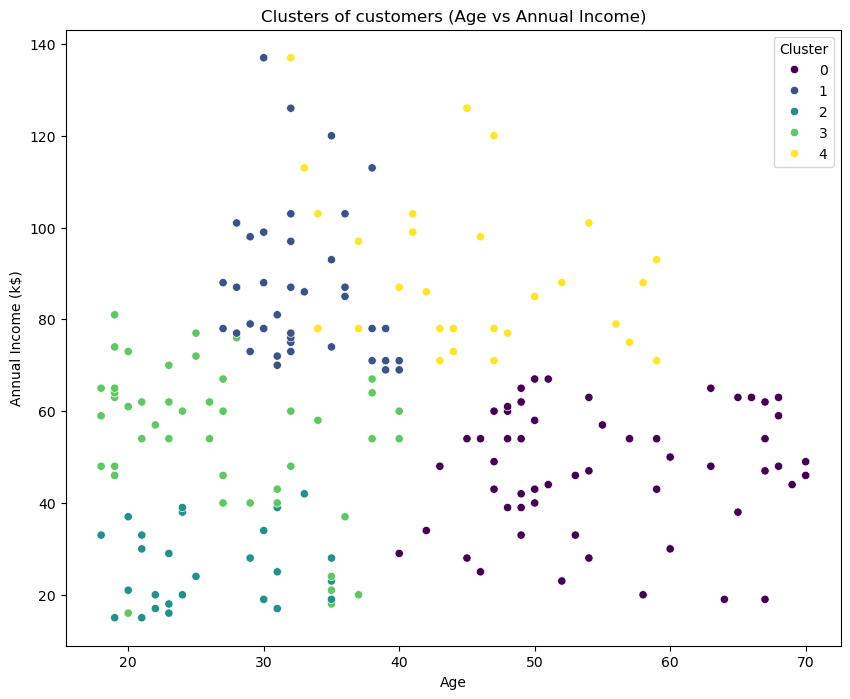

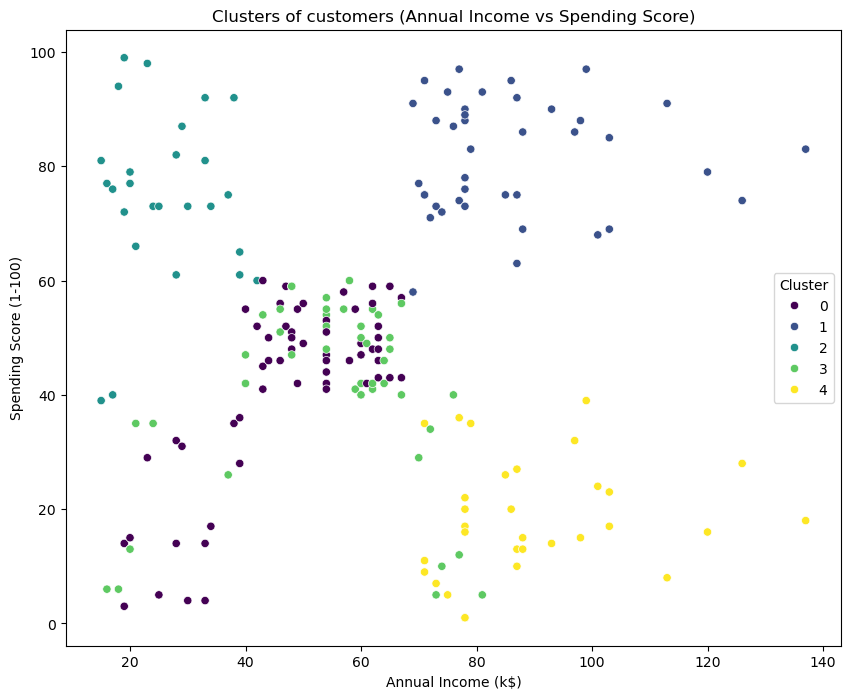

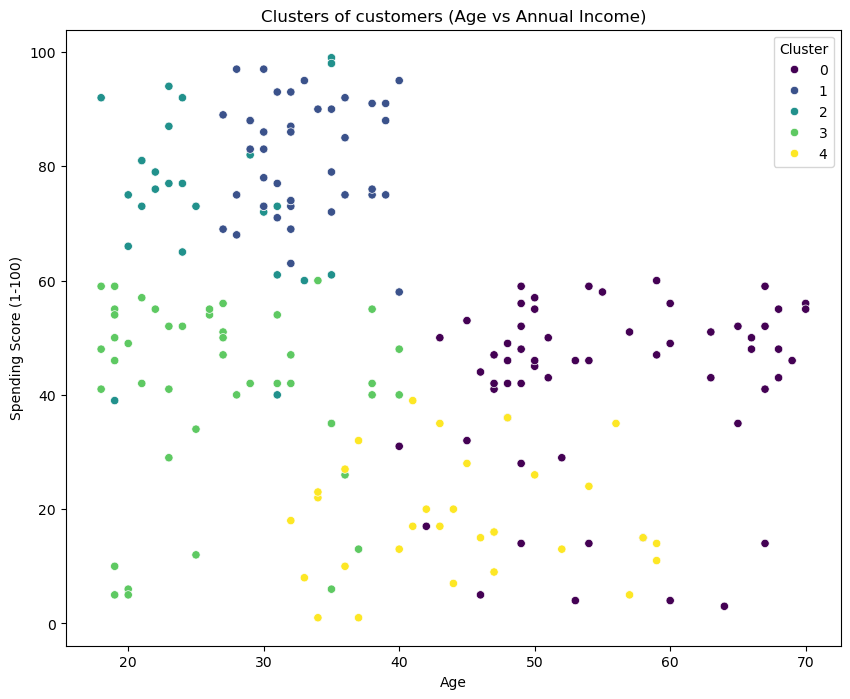

In [5]:
# 2차원으로 군집 시각화 (연령 vs 소득)
plt.figure(figsize=(10, 8))
sns.scatterplot(x=data['Age'], y=data['Annual Income (k$)'], hue=data['Cluster'], palette='viridis')
plt.title('Clusters of customers (Age vs Annual Income)')
plt.show()

# 2차원으로 군집 시각화 (소득 vs 지출 점수)
plt.figure(figsize=(10, 8))
sns.scatterplot(x=data['Annual Income (k$)'], y=data['Spending Score (1-100)'], hue=data['Cluster'], palette='viridis')
plt.title('Clusters of customers (Annual Income vs Spending Score)')
plt.show()

# 연령 vs 지출 
plt.figure(figsize=(10, 8))
sns.scatterplot(x=data['Age'], y=data['Spending Score (1-100)'], hue=data['Cluster'], palette='viridis')
plt.title('Clusters of customers (Age vs Spending Score (1-100))')
plt.show()

In [7]:
# 실루엣분석 사용

from sklearn.metrics import silhouette_score

# 데이터 로드 및 스케일링
data = pd.read_csv('Mall_Customers.csv')# 데이터 파일을 불러옵니다.

# 필요한 열 선택 및 결측값 처리
data = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)  # 데이터 스케일링 (평균을 0, 표준편차를 1로 맞춤)

# 실루엣 분석을 위한 k 값 범위 설정
K = range(2, 11)  # 2~10개의 클러스터를 시도
silhouette_scores = []

# 각 k에 대해 KMeans 군집화 및 실루엣 계수 계산
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    
    # 각 군집의 실루엣 점수 계산
    score = silhouette_score(data_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# 실루엣 계수 결과 출력
for i, k in enumerate(K):
    print(f'k = {k}, 실루엣 계수 = {silhouette_scores[i]:.4f}')


k = 2, 실루엣 계수 = 0.3355
k = 3, 실루엣 계수 = 0.3579
k = 4, 실루엣 계수 = 0.4040
k = 5, 실루엣 계수 = 0.4085
k = 6, 실루엣 계수 = 0.4311
k = 7, 실루엣 계수 = 0.4101
k = 8, 실루엣 계수 = 0.3674
k = 9, 실루엣 계수 = 0.3744
k = 10, 실루엣 계수 = 0.3619


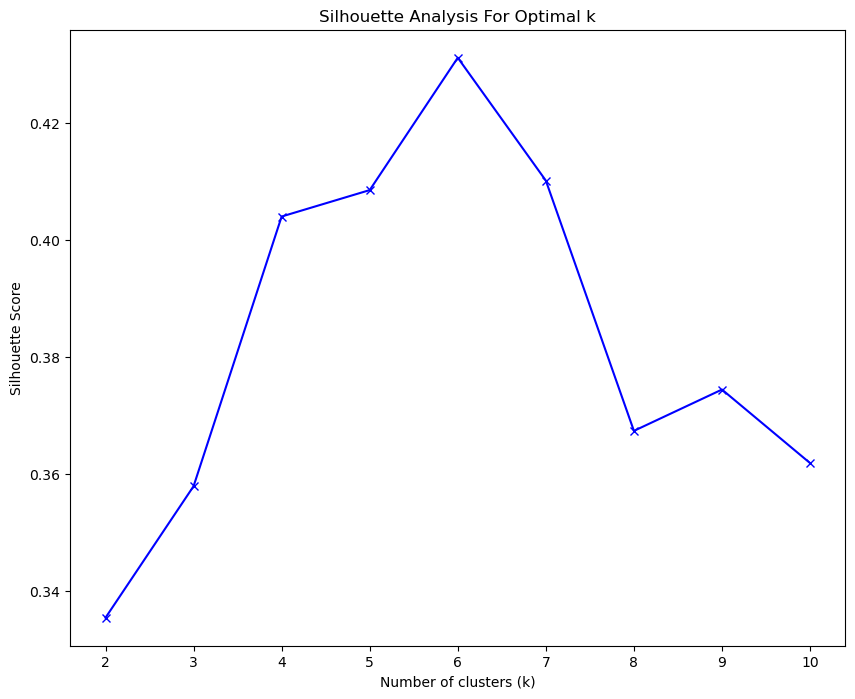

In [9]:
# 실루엣 계수를 시각화하여 최적의 k 찾기
plt.figure(figsize=(10, 8))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis For Optimal k')
plt.show()


In [11]:
# 실루엣 계수가 가장 높은 k 값 찾기
optimal_k = K[np.argmax(silhouette_scores)]
print(f'최적의 k 값은: {optimal_k}')

# 최적의 k로 KMeans 모델 학습
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(data_scaled)

# 군집 결과를 데이터에 할당
data['Cluster'] = kmeans.labels_


최적의 k 값은: 6


In [ ]:
# 2차원으로 군집 시각화 (연령 vs 소득)
plt.figure(figsize=(10, 8))
sns.scatterplot(x=data['Age'], y=data['Annual Income (k$)'], hue=data['Cluster'], palette='viridis')
plt.title('Clusters of customers (Age vs Annual Income)')
plt.show()

# 2차원으로 군집 시각화 (소득 vs 지출 점수)
plt.figure(figsize=(10, 8))
sns.scatterplot(x=data['Annual Income (k$)'], y=data['Spending Score (1-100)'], hue=data['Cluster'], palette='viridis')
plt.title('Clusters of customers (Annual Income vs Spending Score)')
plt.show()
